In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns 

In [5]:
import gensim

In [6]:
import re

In [7]:
from wordcloud import WordCloud

In [8]:
import gensim

In [9]:
from gensim.utils import simple_preprocess

In [10]:
import nltk

In [12]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
from pprint import pprint

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import pyLDAvis.gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [15]:
import pickle 

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
import pyLDAvis

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
import warnings

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
warnings.filterwarnings("ignore")

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
## INICIO EL EJERCICIO
## database
pd.set_option('display.max_rows', None)
sg = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-12-14/lyrics.csv",sep=",", encoding='cp1252')
sg.head()

,artist_name,album_name,track_number,song_id,song_name,line_number,section_name,line,section_artist
0,Spice Girls,Spice,1,89740,Wannabe,1,Intro,Hahaha,"Scary, Ginger"
1,Spice Girls,Spice,1,89740,Wannabe,2,Intro,"Yo, I'll tell you what I want, what I really, ...","Scary, Ginger"
2,Spice Girls,Spice,1,89740,Wannabe,3,Intro,"So tell me what you want, what you really, rea...","Scary, Ginger"
3,Spice Girls,Spice,1,89740,Wannabe,4,Intro,"I'll tell you what I want, what I really, real...","Scary, Ginger"
4,Spice Girls,Spice,1,89740,Wannabe,5,Intro,"So tell me what you want, what you really, rea...","Scary, Ginger"


In [21]:
# Se busca entender cuales son los discos con mayor número de apariciones
sg.groupby(['album_name']).size().reset_index(name='Total').sort_index(ascending=True)

,album_name,Total
0,Forever,717
1,Spice,599
2,Spiceworld,569


<AxesSubplot:xlabel='album_name'>

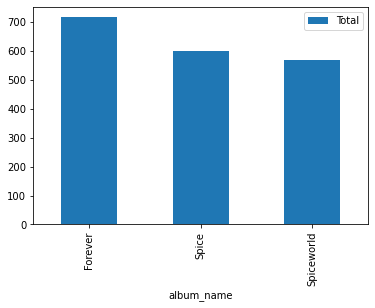

In [22]:
sg.groupby(['album_name']).size().reset_index(name='Total').sort_index(ascending=True).plot(kind='bar',x='album_name')

In [23]:
#list(sg['album_name','song_name'])
sg2 = sg.drop_duplicates(subset=['album_name','song_name'])
sg2.groupby(['album_name','song_name']).size().reset_index(name='Total')

,album_name,song_name,Total
0,Forever,Get Down With Me,1
1,Forever,Goodbye,1
2,Forever,Holler,1
3,Forever,If You Wanna Have Some Fun,1
4,Forever,Let Love Lead the Way,1
5,Forever,Oxygen,1
6,Forever,Right Back At Ya,1
7,Forever,Tell Me Why,1
8,Forever,Time Goes By,1
9,Forever,Wasting My Time,1


Text(0.5, 0, 'Albums')

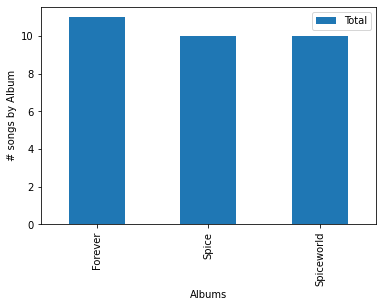

In [24]:
sg3 = sg2.groupby(['album_name','song_name']).size().reset_index(name='Total')
sg3.groupby(['album_name'],as_index=False)['Total'].agg({'Total':'sum'}).plot(kind='bar',x='album_name',y='Total')
plt.ylabel('# songs by Album')
plt.xlabel('Albums')

In [25]:
# Se busca entender el genero o sección como se califica al artista
sg.groupby(['section_artist']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

,section_artist,Total
1,All,331
77,Spice Girls,178
5,All & (Sporty),140
26,Baby,97
63,Scary,65
78,Sporty,56
40,Ginger,54
14,"All, (Sporty)",46
8,All & Sporty,45
38,"Baby, Sporty & Posh",42


In [26]:
sg.drop_duplicates(subset=['album_name','song_name']).groupby(['section_artist']).size().reset_index(name='Total').sort_values(by='Total',ascending=False)

,section_artist,Total
14,Spice Girls,4
0,All,3
6,Ginger,3
15,Sporty,3
3,Baby,2
12,Scary & Baby,1
19,"Sporty, Posh & Baby",1
18,"Sporty, All",1
17,Sporty & Baby,1
16,Sporty & All,1


In [27]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




word



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [28]:
conda install -c conda-forge pyLDAvis


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pyldavis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    funcy-1.16                 |     pyhd8ed1ab_0          30 KB  conda-forge
    pyldavis-3.3.1             |     pyhd8ed1ab_0         114 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         143 KB

The following NEW packages will be INSTALLED:

  funcy              conda-forge/noarch::funcy-1.16-pyhd8ed1ab_0
  pyldavis           conda-forge/noarch::pyldavis-3.3.1-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




funcy-1.16           

In [29]:
conda install -c conda-forge gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gensim-4.0.1               |   py38hd77b12b_0        18.2 MB
    smart_open-5.2.1           |     pyhd8ed1ab_0          43 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        18.2 MB

The following NEW packages will be INSTALLED:

  gensim             pkgs/main/win-64::gensim-4.0.1-py38hd77b12b_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  smart_open         conda-forge/noarch::smart_open-5.2.1-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0




smart_open-5.2.1     | 43 KB    



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [1]:
import re
example_1 = """ El número de telefono de Spiderman es : 123456"""

# Extrayendo Números 
re.findall('[0-9]+',example_1)

['123456']

In [2]:
# Extrayendo palabras
re.findall(r'\w+',example_1)

['El', 'número', 'de', 'telefono', 'de', 'Spiderman', 'es', '123456']

In [3]:
#Extrayendo palabras con mayúsculas
re.findall('([A-Z][a-z]+)', example_1)

['El', 'Spiderman']

In [5]:
import string

In [9]:
import pandas as pd 

In [10]:
pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg['section_artist'] = pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg.head()

NameError: name 'sg' is not defined

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import gensim
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [12]:
pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg['section_artist'] = pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg.head()

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'sg' is not defined

In [14]:
import gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg['section_artist'] = pd.DataFrame(pd.DataFrame(sg['section_artist'].str.split(',|&',n=2,expand=True))[0])
sg.head()

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'sg' is not defined

In [16]:
from pyLDAvis import gensim


C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ImportError: cannot import name 'gensim' from 'pyLDAvis' (C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\__init__.py)

In [17]:
pip install pyLDAvis


C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [19]:
from pyLDAvis import gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ImportError: cannot import name 'gensim' from 'pyLDAvis' (C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\__init__.py)

In [20]:
pip install gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import gensim
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [2]:
from pyLDAvis import gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ImportError: cannot import name 'gensim' from 'pyLDAvis' (C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\__init__.py)

In [3]:
pip install gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyLDAvis import gensim

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ImportError: cannot import name 'gensim' from 'pyLDAvis' (C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\__init__.py)

In [3]:
pip install should_run_async

C:\Users\samsung\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement should_run_async
ERROR: No matching distribution found for should_run_async
